In [1]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash

    !touch .setup_complete

if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Selecting previously unselected package xvfb.
(Reading database ... 155569 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.11_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.11) ...
Setting up xvfb (2:1.19.6-1ubuntu4.11) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Starting virtual X frame buffer: Xvfb.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.3 MB 1.3 MB/s 


/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym

Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)


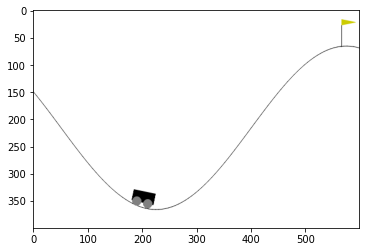

In [2]:

!pip install gym[classic_control]
import gym

env = gym.make("MountainCar-v0")
env.reset()

plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

3 основных метода среды

- reset():  сброс среды в начальное состояние
- render(): графическое отображение текущего состояния среды
- step(a): один шаг (действие агента - изменение среды - получение награди и наблюдения) (new_observation, reward, is_done, info)

       new_observation: наблюдение после действия агента

      reward: награда в результате действия агента

      is_done: True если достигли терминального состояния,   False - иначе

      info: вспомогательная информация



In [3]:
obs0 = env.reset()
print("initial observation code:", obs0)

# В MountainCar, наблюдения - это 2 часла: позиция и скорость авто

print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

# как вы можете видеть, автомобиль немного сдвинулся вправо (около 0.0005)

initial observation code: [-0.40448374  0.        ]
taking action 2 (right)
new observation code: [-4.0435821e-01  1.2552935e-04]
reward: -1.0
is game over?: False


Поиграйте с ним

Ниже приведен код, который ведет автомобиль вправо. Однако, если вы просто используете эту политику, автомобиль не достигнет финиша в крайнем правом углу из-за гравитации.

Ваша задача - исправить это. Найдите стратегию, при которой автомобиль доедет до финиша.

Алгоритм может быть как очень простой так и очень сложный


In [4]:
from IPython import display

TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(
    gym.envs.classic_control.MountainCarEnv(),
    max_episode_steps=TIME_LIMIT + 1,
)
actions = {'left': 0, 'stop': 1, 'right': 2}

In [7]:
def policy(obs, t):
    # Напишите здесь код для вашей политики. Вы можете использовать наблюдение 
    # (кортеж позиции и скорости), текущий шаг по времени или и то, и другое, если хотите.
    position, velocity = obs
 
    T = 'right'
    
    
    actions = {'left': 0, 'stop': 1, 'right': 2}
    
    t = T
    
    # Это пример политики. Вы можете попробовать запустить ее, но она не будет работать. 
    # Ваша цель - исправить это. Здесь не нужно ничего сложного. 
    # Подсказка: подумайте, как бы вы заставили раскачивать качели.
    return actions[t]

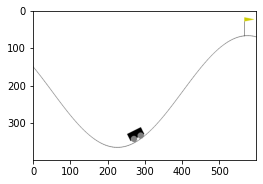

In [8]:
plt.figure(figsize=(4, 3))
display.clear_output(wait=True)

obs = env.reset()
for t in range(TIME_LIMIT):
    plt.gca().clear()
    
    action = policy(obs, t)  # вызов политики
    obs, reward, done, _ = env.step(action)  #  Передаем действие выбранное политикой в среду
    
       # Мы не делаем здесь ничего с вознаграждением, потому что MountainCar - это очень простая 
       # среда, и вознаграждение - это констванта = -1. Поэтому цель - закончить эпизод как можно быстрее.

    # Графическое отображение
    plt.imshow(env.render('rgb_array'))
    
    display.display(plt.gcf())
    display.clear_output(wait=True)

    if done:
        print("Well done!")
        break
else:
    print("Time limit exceeded. Try again.")

display.clear_output(wait=True)